In [1]:
import pandas as pd

# Load data
df = pd.read_csv("../data/Mobile Price Prediction Datatset.csv")

# Inspect
print(df.shape)
display(df.head())

(836, 10)


,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import joblib

# 1. Separate X (features) and y (target)
TARGET = 'Price'
y = df[TARGET]
X = df.drop([TARGET, 'Unnamed: 0'], axis=1)

# 2. Simplify `Brand me` column
def identify_brand(brand_me):
    return brand_me.split()[0]
X['Brand'] = X['Brand me'].apply(lambda x: identify_brand(x))

# 3. Split into training and testing subsets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

# 4. Save VALIDATION data for scoring (after we've trained and evaluated the model)
X_val.to_csv('../data/scoring_data.csv')

# 5. Create preprocessing pipeline

# 5.1 Preprocessing pipeline for numerical features
numerical_transformer = Pipeline([
  ('impute', SimpleImputer(strategy='most_frequent')),
])

# 5.2 Preprocessing pipeline for categorical feature (Brand)
categorical_transformer = Pipeline([
  ('impute', SimpleImputer(strategy='most_frequent')),
  ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# 5.3 Combine
preprocessing_pipeline = make_pipeline(ColumnTransformer(
    
    transformers=[
        ('impute_numerical', numerical_transformer, ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power']),
        ('impute_categorical', categorical_transformer, ['Brand'])
    ],
    
    verbose_feature_names_out=False,
))

# 5.4 Fit and transform X DataFrames
preprocessing_pipeline.fit(X_train)
X_train = preprocessing_pipeline.transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

/home/vscode/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


/home/vscode/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 585, number of used features: 18
[LightGBM] [Info] Start training from score 15568.558974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

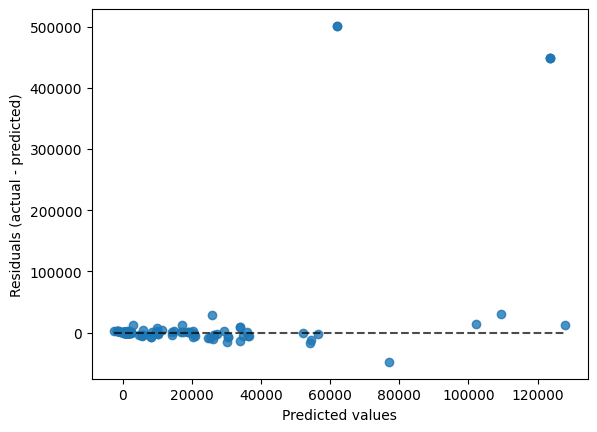

In [3]:
import lightgbm as lgbm
from sklearn.metrics import mean_absolute_percentage_error, PredictionErrorDisplay
import joblib

model = lgbm.LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()

In [4]:
joblib.dump(model, '../models/model.joblib')

['../models/model.joblib']